In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from warnings import filterwarnings
filterwarnings('ignore')

# Practical - 1 : implement Linear Regression using Python.

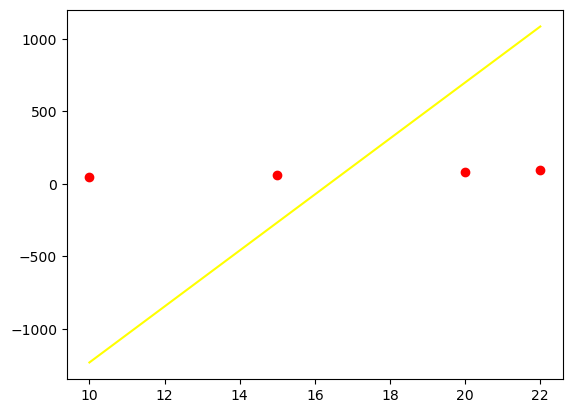

In [25]:
x=np.array([10,15,20,22])
y=np.array([50,60,80,95])
n=np.size(x)
mx=np.mean(x)
my=np.mean(y)
sxx=np.sum(x*x)-n*mx*mx
sxy=np.sum(y*y)-n*mx*my
b1=sxy/sxx
b0=my-b1*mx
b0

plt.scatter(x,y,color="red")
py=b0+b1*x
plt.plot(x,py,color="yellow")

# PRACTICAL 2 : implement Linear Regression using python sklearn

In [2]:
flight_df = pd.read_csv('C:\\Users\Rahel\\Downloads\\flight_delay.csv')

In [3]:
flight_df.shape

(3593, 11)

In [4]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Carrier                 3593 non-null   object
 1   Airport_Distance        3593 non-null   int64 
 2   Number_of_flights       3593 non-null   int64 
 3   Weather                 3593 non-null   int64 
 4   Support_Crew_Available  3593 non-null   int64 
 5   Baggage_loading_time    3593 non-null   int64 
 6   Late_Arrival_o          3593 non-null   int64 
 7   Cleaning_o              3593 non-null   int64 
 8   Fueling_o               3593 non-null   int64 
 9   Security_o              3593 non-null   int64 
 10  Arr_Delay               3593 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 308.9+ KB


In [5]:
flight_df.isnull().sum().sum()

0

In [8]:
flight_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Airport_Distance,3593.0,442.356805,17.166230,376.0,431.0,443.0,454.0,499.0
Number_of_flights,3593.0,43310.909268,2797.425102,29475.0,41634.0,43424.0,45140.0,53461.0
Weather,3593.0,5.353465,0.478112,5.0,5.0,5.0,6.0,6.0
Support_Crew_Available,3593.0,84.996938,41.458894,0.0,56.0,83.0,112.0,222.0
Baggage_loading_time,3593.0,16.978848,0.682748,14.0,17.0,17.0,17.0,19.0
Late_Arrival_o,3593.0,18.740050,0.793418,15.0,18.0,19.0,19.0,22.0
Cleaning_o,3593.0,10.019204,3.469629,-4.0,8.0,10.0,12.0,23.0
Fueling_o,3593.0,25.010019,3.504517,13.0,23.0,25.0,27.0,36.0
Security_o,3593.0,37.087114,7.066573,13.0,32.0,37.0,42.0,63.0
Arr_Delay,3593.0,69.795157,29.224275,0.0,49.0,70.0,90.0,180.0


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
flight_df['Carrier'] = label_encoder.fit_transform(flight_df['Carrier'])

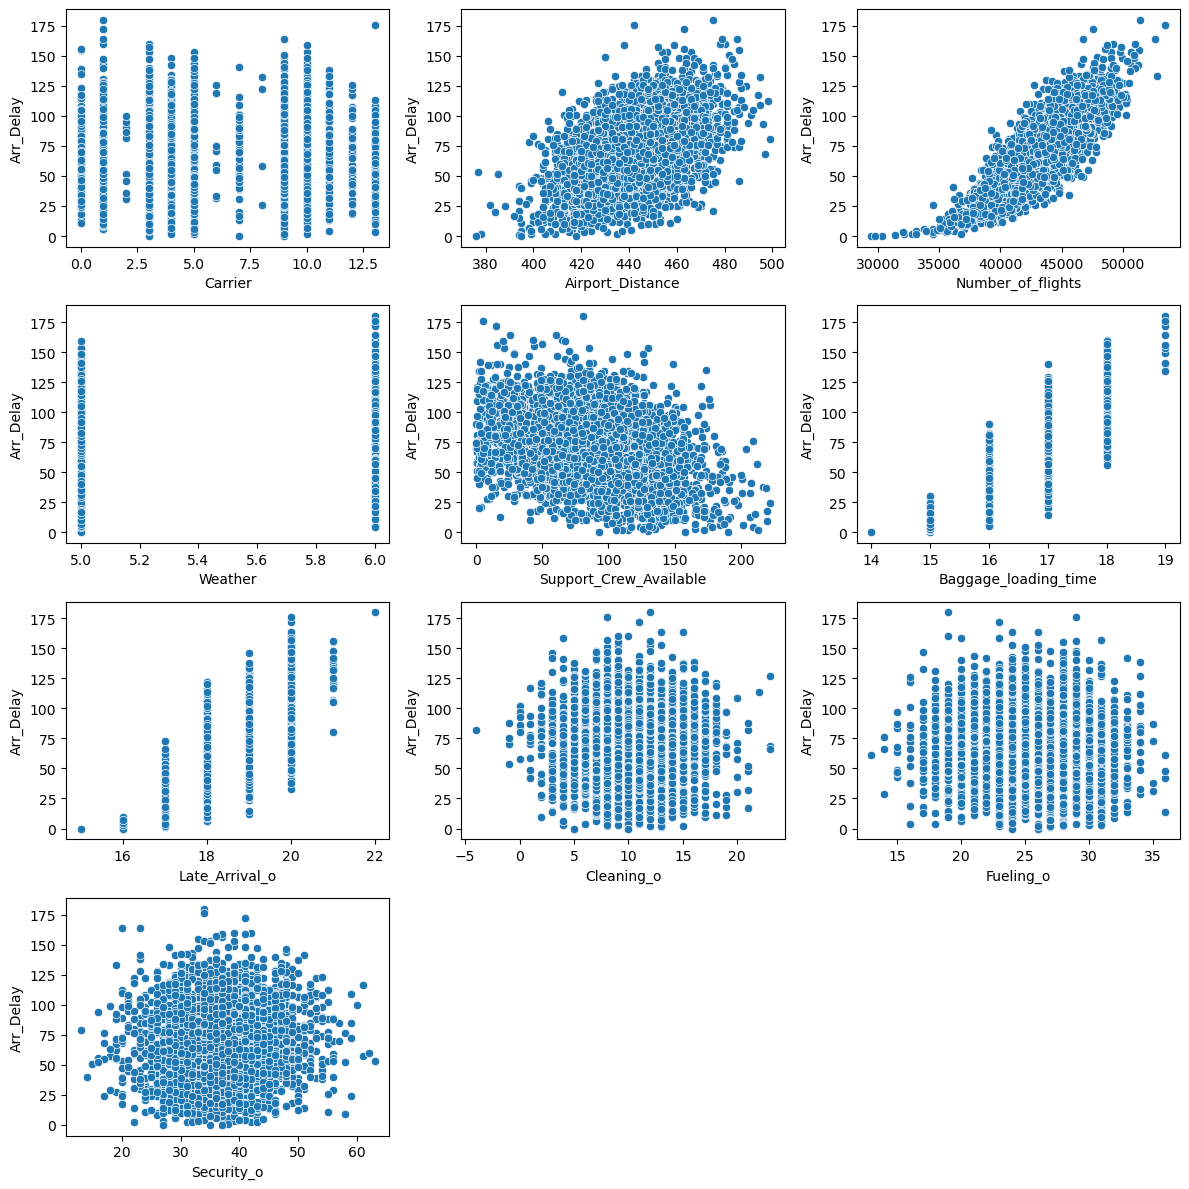

In [12]:
plt.figure(figsize=(12,12))
plotnumber = 1
for column in flight_df.drop('Arr_Delay',axis=1).columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.scatterplot(flight_df[column],flight_df['Arr_Delay'])
    plt.tight_layout()
    plotnumber+=1


<AxesSubplot:>

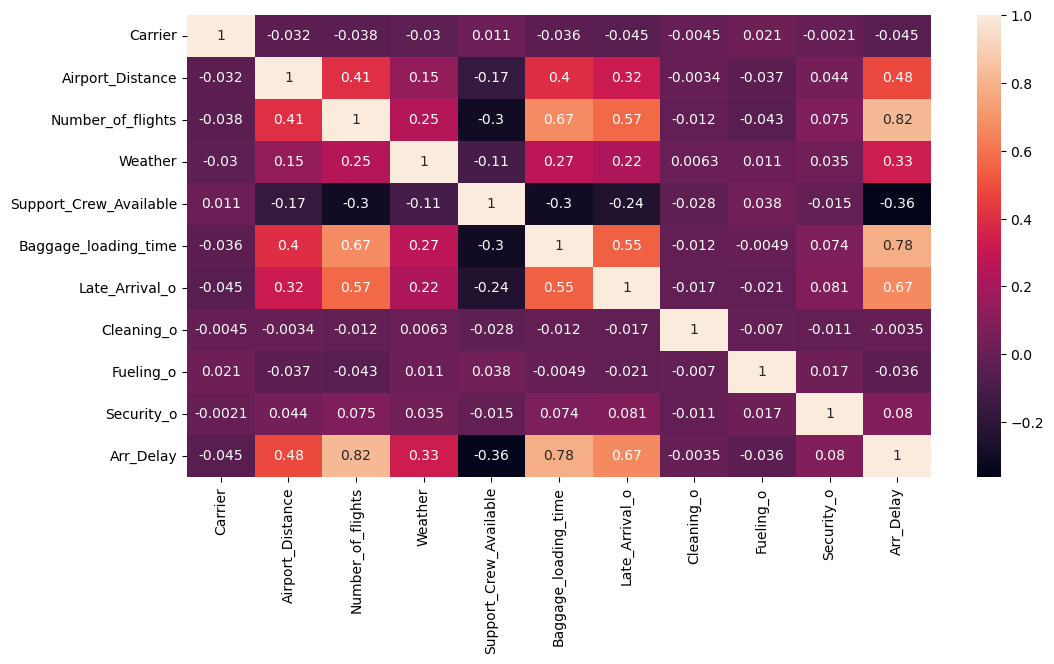

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(flight_df.corr(),annot=True)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

X = flight_df.drop('Arr_Delay',axis=1)
y = flight_df['Arr_Delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler =StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print('Linear Regression model Performance on test data set:')
print(f'Linear Regression model slope value:{model.coef_}')
print(f'Linear Regression model intercept value:{round(model.intercept_,2)}')

print(f'mean_absolute_error: {round(mean_absolute_error(y_test,y_pred),2)}')
print(f'mean_squared_error: {round(mean_squared_error(y_test,y_pred),2)}')
print(f'root_mean_squared_error: {round(np.sqrt(mean_absolute_error(y_test,y_pred)),2)}')
print(f'r-squared value: {round(r2_score(y_test,y_pred),2)}')

Linear Regression model Performance on test data set:
Linear Regression model slope value:[-2.39819794e-01  2.82542621e+00  1.24323905e+01  2.11016315e+00
 -1.95472789e+00  9.11979695e+00  5.69881720e+00  4.98973206e-02
 -1.44113375e-01 -1.05386579e-02]
Linear Regression model intercept value:69.79
mean_absolute_error: 9.81
mean_squared_error: 152.12
root_mean_squared_error: 3.13
r-squared value: 0.82


# PRACTICAL 3 : Implement Logistic Regression using python sklearn 

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import plot_confusion_matrix

In [28]:
cancer_df = pd.read_excel('C:\\Users\\Rahel\\Downloads\\cancer_data.xlsx')

In [29]:
cancer_df.shape

(600, 11)

In [30]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_No                    600 non-null    int64 
 1   Thickness_of_Clump           600 non-null    int64 
 2   Cell_Size_Uniformity         600 non-null    int64 
 3   Cell_Shape_Uniformity        600 non-null    int64 
 4   Marginal_Adhesion            600 non-null    int64 
 5   Single_Epithelial_Cell_Size  600 non-null    int64 
 6   Bare_Nuclei                  600 non-null    int64 
 7   Bland_Chromatin              600 non-null    int64 
 8   Normal_Nucleoli              600 non-null    int64 
 9   Mitoses                      600 non-null    int64 
 10  Outcome                      600 non-null    object
dtypes: int64(10), object(1)
memory usage: 51.7+ KB


In [31]:
cancer_df.isnull().sum().sum()

0

In [32]:
cancer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sample_No,600.0,300.500000,173.349358,1.0,150.75,300.5,450.25,600.0
Thickness_of_Clump,600.0,5.410000,2.798503,1.0,3.00,5.0,7.25,10.0
Cell_Size_Uniformity,600.0,4.121667,2.936194,1.0,2.00,3.0,6.00,10.0
Cell_Shape_Uniformity,600.0,4.195000,2.926531,1.0,2.00,3.0,6.00,10.0
Marginal_Adhesion,600.0,3.763333,2.782726,1.0,2.00,3.0,5.00,10.0
Single_Epithelial_Cell_Size,600.0,4.293333,2.279462,1.0,3.00,4.0,5.00,10.0
Bare_Nuclei,600.0,4.500000,3.476129,1.0,2.00,3.0,9.00,10.0
Bland_Chromatin,600.0,4.495000,2.438555,1.0,3.00,4.0,6.00,10.0
Normal_Nucleoli,600.0,3.811667,3.031751,1.0,2.00,3.0,5.00,10.0
Mitoses,600.0,2.093333,1.763464,1.0,1.00,2.0,2.00,10.0


In [33]:
cancer_df['Outcome'].value_counts()

No     380
Yes    220
Name: Outcome, dtype: int64

In [34]:
cancer_df['Outcome'] = cancer_df['Outcome'].replace({'No':0,'Yes':1})

In [35]:
 def model_performance(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = round(accuracy_score(true, predicted),2) 
    f1 = round(f1_score(true, predicted),2)
    precision = round(precision_score(true, predicted),2)
    recall = round(recall_score(true, predicted),2) 
    roc_auc = round(roc_auc_score(true, predicted),2)
    return acc, f1 , precision, recall, roc_auc

In [47]:
def model_building(X,y,models):
    '''
    This function takes in X and y and models  as input.
    It splits the data into Train Test split.
    evaluates the performance metrics on  test dataset.
    
    '''
    
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    for i in range(len(list(models))):
        key = list(models.keys())[i]
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        
        # model prediction 
        y_test_pred = model.predict(X_test)

        # model Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=model_performance(y_test, y_test_pred)

        print(f'{key} Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print('='*35)
        print('\n')
        plot_confusion_matrix(model,X_test,y_test,cmap='Blues', values_format='d')

Logistic Regression Model performance for Test set
- Accuracy: 0.9900
- F1 score: 0.9900
- Precision: 1.0000
- Recall: 0.9700
- Roc Auc Score: 0.9900




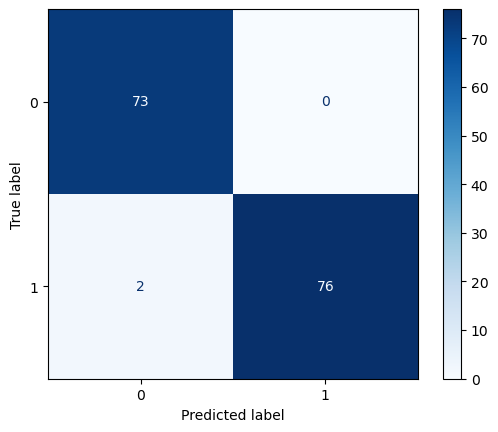

In [48]:
models = {"Logistic Regression": LogisticRegression()}
logistic_model = model_building(X=X,y=y,models=models)

# PRACTICAL- 4 : Implement Decesion Tree Classifier using python sklearn

In [110]:
churn_df = pd.read_csv('C://Users//Rahel//Downloads/churn.csv')

In [111]:
churn_df.shape

(1000, 14)

In [112]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 1000 non-null   object 
 1   Marital_Status      1000 non-null   object 
 2   Term                1000 non-null   int64  
 3   Phone_service       1000 non-null   object 
 4   International_plan  1000 non-null   object 
 5   Voice_mail_plan     1000 non-null   object 
 6   Multiple_line       1000 non-null   object 
 7   Internet_service    1000 non-null   object 
 8   Technical_support   1000 non-null   object 
 9   Streaming_Videos    1000 non-null   object 
 10  Agreement_period    1000 non-null   object 
 11  Monthly_Charges     1000 non-null   float64
 12  Total_Charges       1000 non-null   float64
 13  Churn               1000 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


In [113]:
churn_df['Churn'].value_counts()

No     741
Yes    259
Name: Churn, dtype: int64

In [114]:
churn_df.isnull().sum().sum()

0

In [115]:
categorial_features = [feature for feature in churn_df.columns if churn_df[feature].dtype=='object']
print(f'Total no of categorial feature:{len(categorial_features)}\n')
print(categorial_features,end=" ")

Total no of categorial feature:11

['Sex', 'Marital_Status', 'Phone_service', 'International_plan', 'Voice_mail_plan', 'Multiple_line', 'Internet_service', 'Technical_support', 'Streaming_Videos', 'Agreement_period', 'Churn'] 

In [116]:
numerical_features = [feature for feature in churn_df.columns if churn_df[feature].dtype!='object']
print(f'Total no of categorial feature:{len(numerical_features)}\n')
print(numerical_features,end=" ")

Total no of categorial feature:3

['Term', 'Monthly_Charges', 'Total_Charges'] 

In [117]:
categorial_df = churn_df[categorial_features]
categorial_df = pd.get_dummies(categorial_df,drop_first=True)
categorial_df.shape

(1000, 18)

In [118]:
numerical_df = churn_df[numerical_features]

In [119]:
churn_df = pd.concat([numerical_df,categorial_df],axis=1)
churn_df.shape

(1000, 21)

In [120]:
churn_df.isnull().sum().sum()

0

In [126]:
def model_performance(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = round(accuracy_score(true, predicted),2) 
    f1 = round(f1_score(true, predicted),2)
    precision = round(precision_score(true, predicted),2)
    recall = round(recall_score(true, predicted),2) 
    roc_auc = round(roc_auc_score(true, predicted),2)
    return acc, f1 , precision, recall, roc_auc



def model_building(X,y,models):
    '''
    This function takes in X and y and models  as input.
    It splits the data into Train Test split.
    evaluates the performance metrics on  test dataset.
    
    '''
    
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    for i in range(len(list(models))):
        key = list(models.keys())[i]
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        
        # model prediction 
        y_test_pred = model.predict(X_test)

        # model Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=model_performance(y_test, y_test_pred)

        print(f'{key} Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print('='*35)
        print('\n')
        plot_confusion_matrix(model,X_test,y_test,cmap='Blues', values_format='d')
        plt.figure(figsize=(12,6),dpi=150)
        plot_tree(model,feature_names=X.columns,filled=True,max_depth=2);

Decesion Tree Model performance for Test set
- Accuracy: 0.8400
- F1 score: 0.8400
- Precision: 0.8700
- Recall: 0.8000
- Roc Auc Score: 0.8400




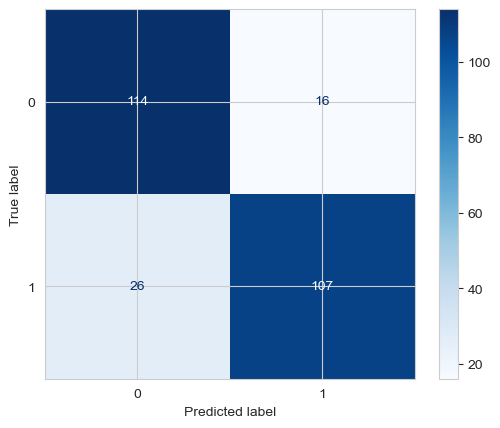

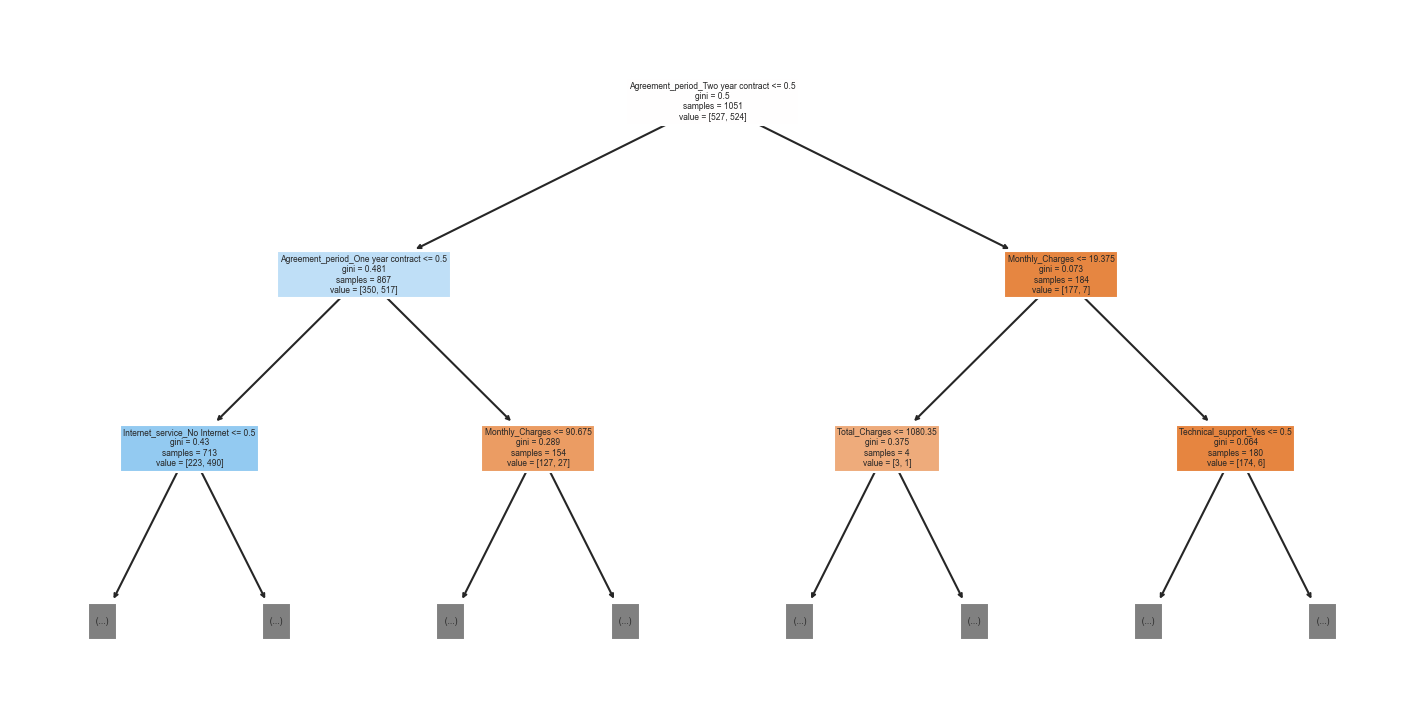

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
X = churn_df.drop('Churn_Yes',axis=1)
y = churn_df['Churn_Yes']

smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
X, y= smt.fit_resample(X, y)

models = {'Decesion Tree':DecisionTreeClassifier()}
model_building(X=X,y=y,models=models)

# PRACTICAL 5 : Implement Random Forest using python sklearn 

In [97]:
loan_df = pd.read_csv('C://Users//Rahel//Downloads//loan.csv')

In [98]:
loan_df.shape

(1000, 16)

In [99]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Default           1000 non-null   int64 
 1   Checking_amount   1000 non-null   int64 
 2   Term              1000 non-null   int64 
 3   Credit_score      1000 non-null   int64 
 4   Gender            1000 non-null   object
 5   Marital_status    1000 non-null   object
 6   Car_loan          1000 non-null   int64 
 7   Personal_loan     1000 non-null   int64 
 8   Home_loan         1000 non-null   int64 
 9   Education_loan    1000 non-null   int64 
 10  Emp_status        1000 non-null   object
 11  Amount            1000 non-null   int64 
 12  Saving_amount     1000 non-null   int64 
 13  Emp_duration      1000 non-null   int64 
 14  Age               1000 non-null   int64 
 15  No_of_credit_acc  1000 non-null   int64 
dtypes: int64(13), object(3)
memory usage: 125.1+ KB


In [100]:
loan_df['Gender'] = loan_df['Gender'].replace({'Male':0,'Female':1})
loan_df['Marital_status'] = loan_df['Marital_status'].replace({'Single':0,'Married':1})
loan_df['Emp_status'] = loan_df['Emp_status'].replace({'unemployed':0,'employed':1})

In [101]:
loan_df.isnull().sum().sum()

0

In [102]:
loan_df['Default'].value_counts()

0    700
1    300
Name: Default, dtype: int64

In [103]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Default,1000.0,0.300,0.458487,0.0,0.00,0.0,1.00,1.0
Checking_amount,1000.0,362.411,300.901202,-665.0,164.75,351.5,553.50,1319.0
Term,1000.0,17.815,3.240567,9.0,16.00,18.0,20.00,27.0
Credit_score,1000.0,760.475,77.556214,376.0,725.75,770.5,812.00,1029.0
Gender,1000.0,0.310,0.462725,0.0,0.00,0.0,1.00,1.0
Marital_status,1000.0,0.548,0.497940,0.0,0.00,1.0,1.00,1.0
Car_loan,1000.0,0.353,0.478142,0.0,0.00,0.0,1.00,1.0
Personal_loan,1000.0,0.474,0.499573,0.0,0.00,0.0,1.00,1.0
Home_loan,1000.0,0.056,0.230037,0.0,0.00,0.0,0.00,1.0
Education_loan,1000.0,0.112,0.315524,0.0,0.00,0.0,0.00,1.0


In [104]:
def model_performance(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = round(accuracy_score(true, predicted),2) 
    f1 = round(f1_score(true, predicted),2)
    precision = round(precision_score(true, predicted),2)
    recall = round(recall_score(true, predicted),2) 
    roc_auc = round(roc_auc_score(true, predicted),2)
    return acc, f1 , precision, recall, roc_auc



def model_building(X,y,models):
    '''
    This function takes in X and y and models  as input.
    It splits the data into Train Test split.
    evaluates the performance metrics on  test dataset.
    
    '''
    
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    for i in range(len(list(models))):
        key = list(models.keys())[i]
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        
        # model prediction 
        y_test_pred = model.predict(X_test)

        # model Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=model_performance(y_test, y_test_pred)

        print(f'{key} Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print('='*35)
        print('\n')
        plot_confusion_matrix(model,X_test,y_test,cmap='Blues', values_format='d')

Random Forest Model performance for Test set
- Accuracy: 0.9300
- F1 score: 0.9400
- Precision: 0.9300
- Recall: 0.9400
- Roc Auc Score: 0.9300




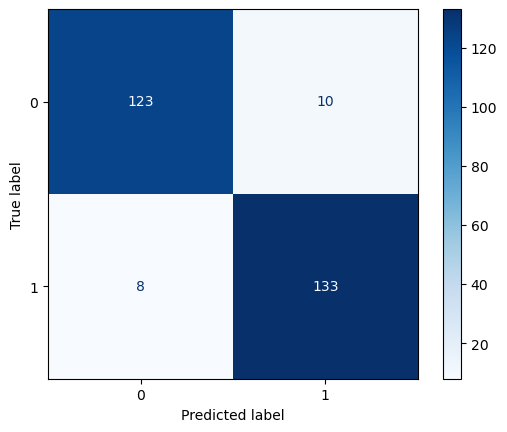

In [108]:
X = loan_df.drop('Default',axis=1)
y = loan_df['Default']

smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
X, y= smt.fit_resample(X, y)

from sklearn.ensemble import RandomForestClassifier

models = {'Random Forest': RandomForestClassifier()}
model_building(X=X,y=y,models=models)

# PRACTICAL - 6 : To implement K-mean clustering using Elbow method

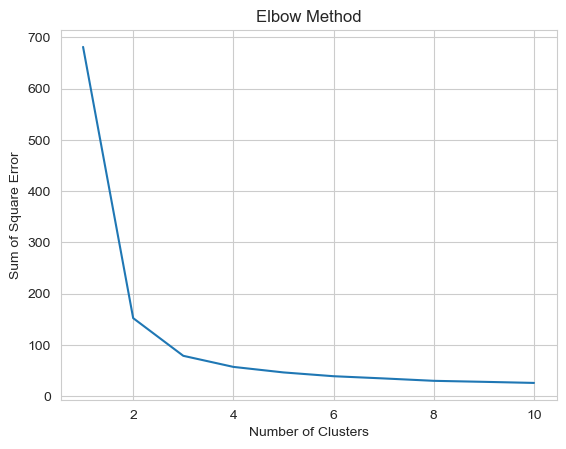

Inertia for k=3: 78.85144142614601


In [109]:
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X, y = load_iris(return_X_y=True)
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)

sns.set_style("whitegrid")
g = sns.lineplot(x=range(1, 11), y=sse)
g.set(xlabel="Number of Clusters", ylabel="Sum of Square Error", title="Elbow Method")
plt.show()
k = KMeans(n_clusters=3, random_state=2)  # Change n_cluster to n_clusters
k.fit(X)
inertia = k.inertia_
print("Inertia for k=3:", inertia)